In [1]:
import pandas as pd

data = pd.read_csv('/Users/izlemkurt/Desktop/MLQS/Raw Data.csv')
print(data.head())


   Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0  0.002191               -1.951791                6.049520   
1  0.012268               -1.890868                5.964347   
2  0.022344               -1.807940                5.961952   
3  0.032421               -1.686842                6.022726   
4  0.042497               -1.557361                6.059100   

   Acceleration z (m/s^2)  Absolute acceleration (m/s^2)  
0                7.590116                       9.900305  
1                7.961494                      10.125917  
2                8.326136                      10.398945  
3                8.588540                      10.624579  
4                8.686586                      10.704898  


In [2]:
data.describe()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
count,47962.000000,47962.000000,47962.000000,47962.000000,47962.000000
mean,241.649083,-0.141022,4.964572,8.285406,9.997631
std,139.523701,1.206722,2.002391,2.550207,2.308973
min,0.002191,-8.887917,-3.626958,-2.447560,1.498592
25%,120.821270,-0.506996,3.675008,6.774313,9.596846
50%,241.644667,-0.354014,5.484295,8.014484,9.804571
75%,362.474303,0.090711,6.969619,8.885597,9.949113
max,483.315672,7.790549,11.448193,27.463839,27.472435


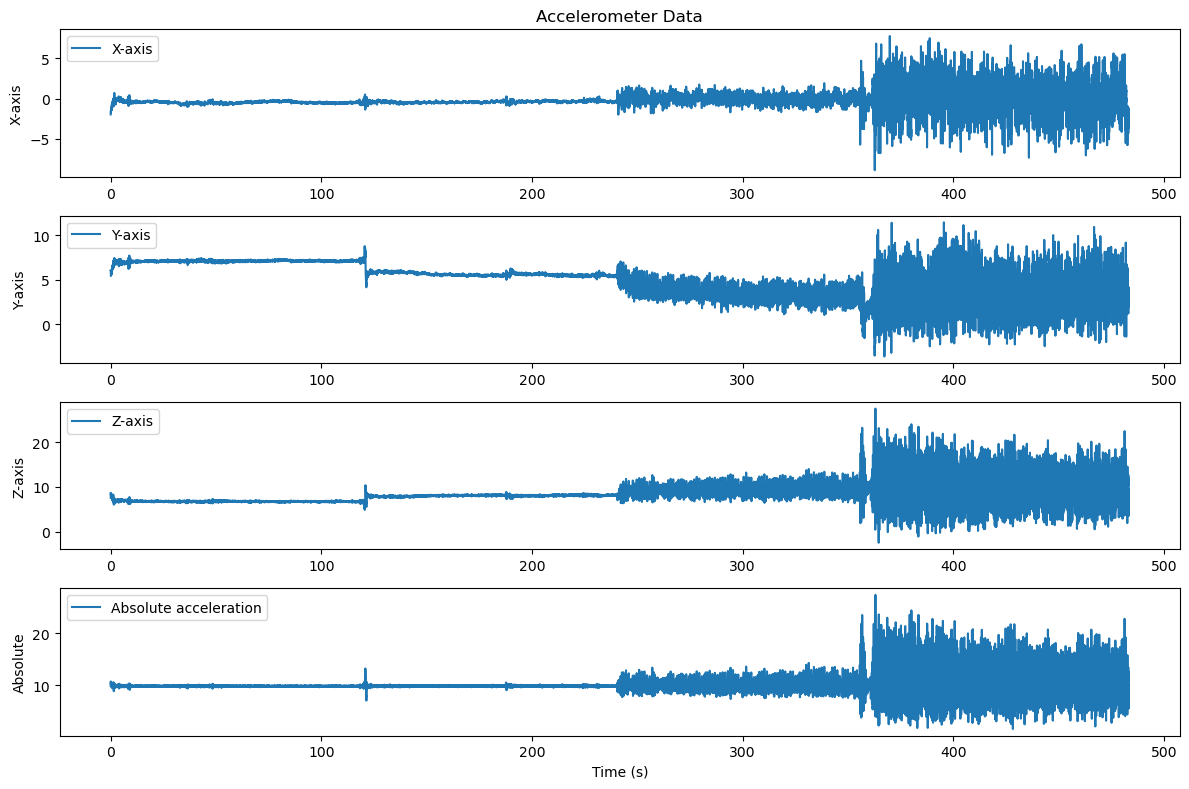

In [3]:
import matplotlib.pyplot as plt

# Plot the accelerometer data
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Time (s)'], data['Acceleration x (m/s^2)'], label='X-axis')
plt.title('Accelerometer Data')
plt.ylabel('X-axis')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(data['Time (s)'], data['Acceleration y (m/s^2)'], label='Y-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(data['Time (s)'], data['Acceleration z (m/s^2)'], label='Z-axis')
plt.ylabel('Z-axis')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(data['Time (s)'], data['Absolute acceleration (m/s^2)'], label='Absolute acceleration')
plt.ylabel('Absolute')
plt.xlabel('Time (s)')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
data.isnull().sum()

Time (s)                         0
Acceleration x (m/s^2)           0
Acceleration y (m/s^2)           0
Acceleration z (m/s^2)           0
Absolute acceleration (m/s^2)    0
dtype: int64

Labelling Data

In [6]:
activity_duration = 60  # 1 minute

# Create the time intervals
activities = ['sitting', 'standing', 'walking', 'running']
intervals = [(i * activity_duration, (i + 1) * activity_duration) for i in range(len(activities))]

data['Activity'] = 'unknown'

# Label the data based on the intervals
for activity, (start, end) in zip(activities, intervals):
    data.loc[(data['Time (s)'] >= start) & (data['Time (s)'] < end), 'Activity'] = activity

print(data.head(10))
print(data['Activity'].value_counts())

   Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0  0.002191               -1.951791                6.049520   
1  0.012268               -1.890868                5.964347   
2  0.022344               -1.807940                5.961952   
3  0.032421               -1.686842                6.022726   
4  0.042497               -1.557361                6.059100   
5  0.052573               -1.581162                6.014792   
6  0.062650               -1.631906                5.896688   
7  0.072726               -1.576671                5.821843   
8  0.082803               -1.507964                5.825885   
9  0.092879               -1.528172                5.792804   

   Acceleration z (m/s^2)  Absolute acceleration (m/s^2) Activity  
0                7.590116                       9.900305  sitting  
1                7.961494                      10.125917  sitting  
2                8.326136                      10.398945  sitting  
3                8.588540         

In [7]:
summary_stats = data.describe().transpose()
summary_stats['missing (%)'] = data.isnull().mean() * 100

# Calculate percentage of each activity
activity_percentage = data['Activity'].value_counts(normalize=True) * 100

print(summary_stats)
print(activity_percentage)


                                 count        mean         std       min  \
Time (s)                       47962.0  241.649083  139.523701  0.002191   
Acceleration x (m/s^2)         47962.0   -0.141022    1.206722 -8.887917   
Acceleration y (m/s^2)         47962.0    4.964572    2.002391 -3.626958   
Acceleration z (m/s^2)         47962.0    8.285406    2.550207 -2.447560   
Absolute acceleration (m/s^2)  47962.0    9.997631    2.308973  1.498592   

                                      25%         50%         75%         max  \
Time (s)                       120.821270  241.644667  362.474303  483.315672   
Acceleration x (m/s^2)          -0.506996   -0.354014    0.090711    7.790549   
Acceleration y (m/s^2)           3.675008    5.484295    6.969619   11.448193   
Acceleration z (m/s^2)           6.774313    8.014484    8.885597   27.463839   
Absolute acceleration (m/s^2)    9.596846    9.804571    9.949113   27.472435   

                               missing (%)  
Time (s)   

In [8]:
summary_table = summary_stats[['mean', 'std', 'min', 'max', 'missing (%)']]
print(summary_table)

# Create a table for the percentage of each activity
activity_table = pd.DataFrame(activity_percentage).reset_index()
activity_table.columns = ['Activity', 'Percentage of cases (%)']
print(activity_table)


                                     mean         std       min         max  \
Time (s)                       241.649083  139.523701  0.002191  483.315672   
Acceleration x (m/s^2)          -0.141022    1.206722 -8.887917    7.790549   
Acceleration y (m/s^2)           4.964572    2.002391 -3.626958   11.448193   
Acceleration z (m/s^2)           8.285406    2.550207 -2.447560   27.463839   
Absolute acceleration (m/s^2)    9.997631    2.308973  1.498592   27.472435   

                               missing (%)  
Time (s)                               0.0  
Acceleration x (m/s^2)                 0.0  
Acceleration y (m/s^2)                 0.0  
Acceleration z (m/s^2)                 0.0  
Absolute acceleration (m/s^2)          0.0  
   Activity  Percentage of cases (%)
0   sitting                24.830074
1  standing                24.830074
2   walking                24.827989
3   running                24.825904
4   unknown                 0.685960


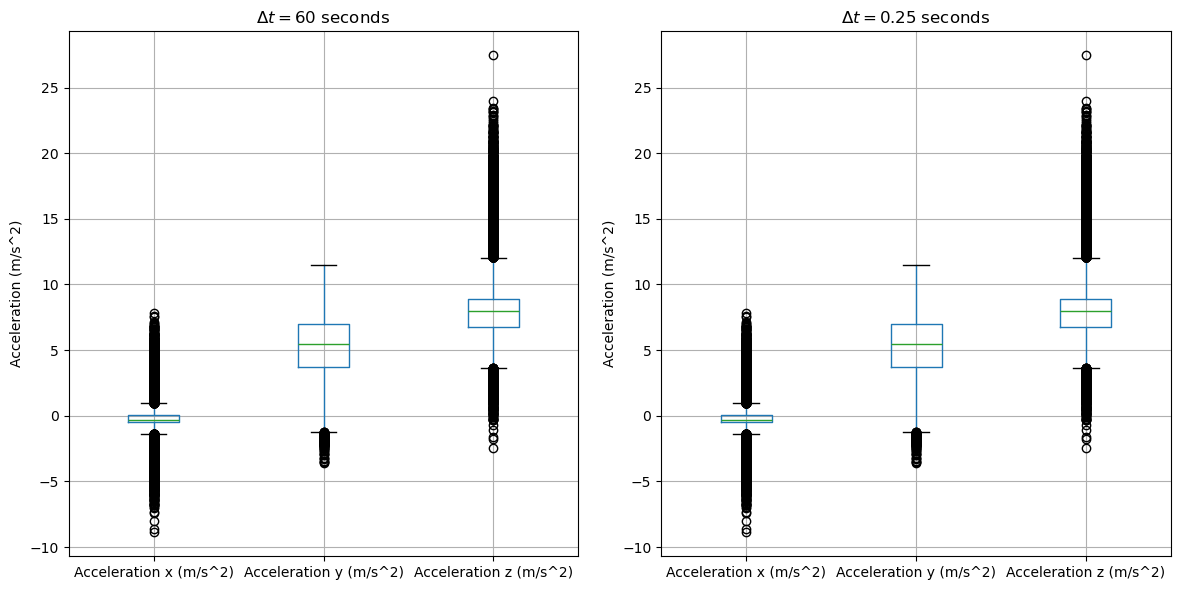

In [15]:
# Boxplot for each accelerometer axis
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data[['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)']].boxplot()
plt.title(r'$\Delta t = 60$ seconds')
plt.ylabel('Acceleration (m/s^2)')


plt.subplot(1, 2, 2)
data[['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)']].boxplot()
plt.title(r'$\Delta t = 0.25$ seconds')
plt.ylabel('Acceleration (m/s^2)')

plt.tight_layout()
plt.show()